## EDA and Prediction of US Accidents

## Team: Jayatha Chandra, Avanti Dorle, Lavina Omprakash Talreja, Mansi Pravin Thanki

In [ ]:
#IDMP PROJECT
#JLAM


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
accidents_dataset = pd.read_csv("US_Accidents_Dec21_updated.csv", na_values='')
display(accidents_dataset.head())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [13]:
accidents_dataset.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [14]:
accidents_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

#### For data cleaning part, we have decided to split equal columns with all 4 members so each one gets to clean the data.

In [40]:
# Part A columns 0-11


In [17]:
# Columns 11 to 23 being handled

partB = accidents_dataset.iloc[:, 11 : 23]
partB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Street             object 
 1   Side               object 
 2   City               object 
 3   County             object 
 4   State              object 
 5   Zipcode            object 
 6   Country            object 
 7   Timezone           object 
 8   Airport_Code       object 
 9   Weather_Timestamp  object 
 10  Temperature(F)     float64
 11  Wind_Chill(F)      float64
dtypes: float64(2), object(10)
memory usage: 260.5+ MB


In [18]:
partB.describe()

,Temperature(F),Wind_Chill(F)
count,2.776068e+06,2.375699e+06
mean,6.179356e+01,5.965823e+01
std,1.862263e+01,2.116097e+01
min,-8.900000e+01,-8.900000e+01
25%,5.000000e+01,4.600000e+01
50%,6.400000e+01,6.300000e+01
75%,7.600000e+01,7.600000e+01
max,1.960000e+02,1.960000e+02


In [19]:
partB.isna().sum()

Street                    2
Side                      0
City                    137
County                    0
State                     0
Zipcode                1319
Country                   0
Timezone               3659
Airport_Code           9549
Weather_Timestamp     50736
Temperature(F)        69274
Wind_Chill(F)        469643
dtype: int64

We can observe there are many NA values in these columns. For numerical, we will impute NA values with mean of the column and for other columns, we are replacing it with mode of the column.

In [20]:
partB.head()

,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F)
0,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1
1,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN
2,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN
3,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN
4,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8


In [21]:
# Imputing numerical columns NA with mean.

partB["Wind_Chill(F)"].fillna(value=partB["Wind_Chill(F)"].mean(), inplace=True)
partB["Temperature(F)"].fillna(value=partB["Temperature(F)"].mean(), inplace=True)
partB.isna().sum()

Street                   2
Side                     0
City                   137
County                   0
State                    0
Zipcode               1319
Country                  0
Timezone              3659
Airport_Code          9549
Weather_Timestamp    50736
Temperature(F)           0
Wind_Chill(F)            0
dtype: int64

In [37]:
# Imputing categorical/object NA data with mode of the column.

partB["Airport_Code"].fillna(value=partB["Airport_Code"].mode()[0], inplace=True)
partB["Timezone"].fillna(value=partB["Timezone"].mode()[0], inplace=True)
partB["City"].fillna(value=partB["City"].mode()[0], inplace=True)
partB["Zipcode"].fillna(value=partB["Zipcode"].mode()[0], inplace=True)
partB["Weather_Timestamp"].fillna(value=partB["Weather_Timestamp"].mode()[0], inplace=True)
partB["Street"].fillna(partB["Street"].mode()[0], inplace=True)
partB.isna().sum()

Street               0
Side                 0
City                 0
County               0
State                0
Zipcode              0
Country              0
Timezone             0
Airport_Code         0
Weather_Timestamp    0
Temperature(F)       0
Wind_Chill(F)        0
dtype: int64

We can see there are no null values anymore in the dataset.

In [41]:
# Part C columns 23-34

# Part D columns 34-46


Let us move on to the EDA.

Some original plots mentioned in the project proposal

#### Accident cases severity

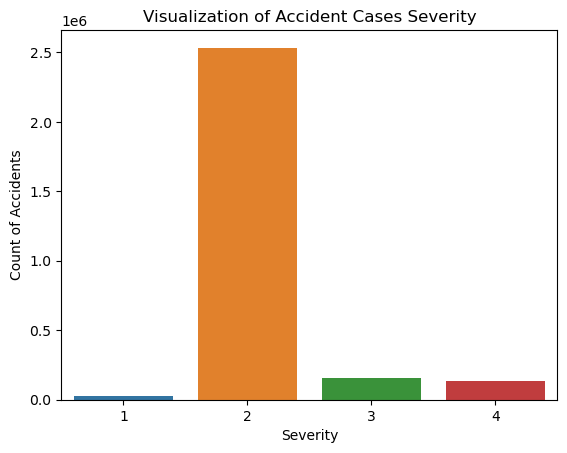

In [42]:
sns.countplot(x='Severity', data=accidents_dataset)
plt.xlabel('Severity')
plt.ylabel('Count of Accidents')
plt.title('Accident cases severity')
plt.show()

#### Number of accidents based on time of the day

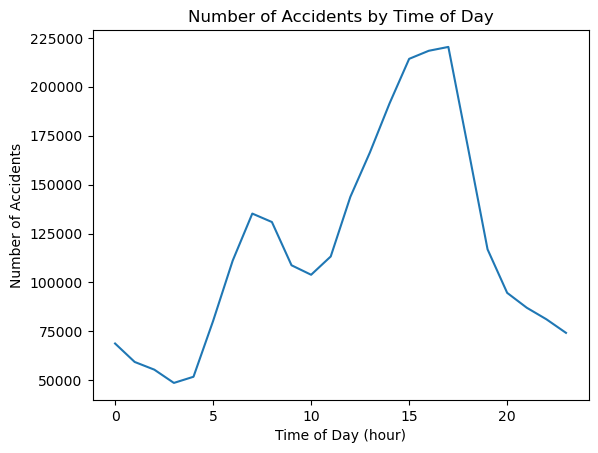

In [43]:
accidents_dataset['hour'] = pd.to_datetime(accidents_dataset['Start_Time']).dt.hour
hourly_counts = accidents_dataset.groupby('hour').size().reset_index(name='count')
sns.lineplot(x='hour', y='count', data=hourly_counts)
plt.title('Number of Accidents by Time of Day')
plt.xlabel('Time of Day (hour)')
plt.ylabel('Number of Accidents')
plt.show()

#### Distribution of accidents based on states

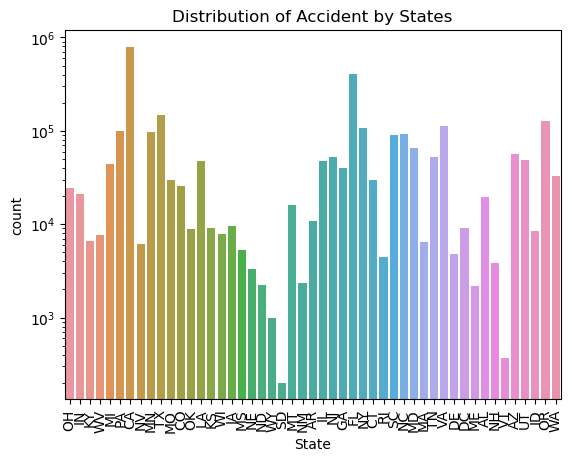

In [48]:
# NOTE: check for legend

sns.countplot(x='State', data=accidents_dataset)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of Accident by States')
plt.show()

#### Number of accidents per year

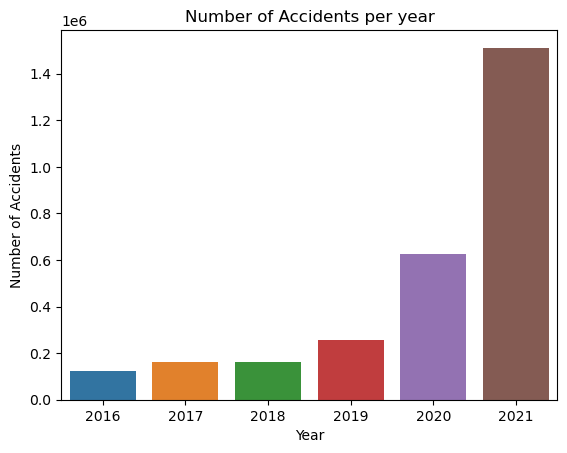

In [63]:
# NOTE: check y axis limits

accidents_dataset['Year'] = pd.to_datetime(accidents_dataset['Start_Time']).dt.year
yearly_counts = accidents_dataset.groupby('Year').size().reset_index(name='count')
sns.barplot(x='Year', y='count', data=yearly_counts, ci=None)
plt.title('Number of Accidents per year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

#### Number of Accidents based on humidity

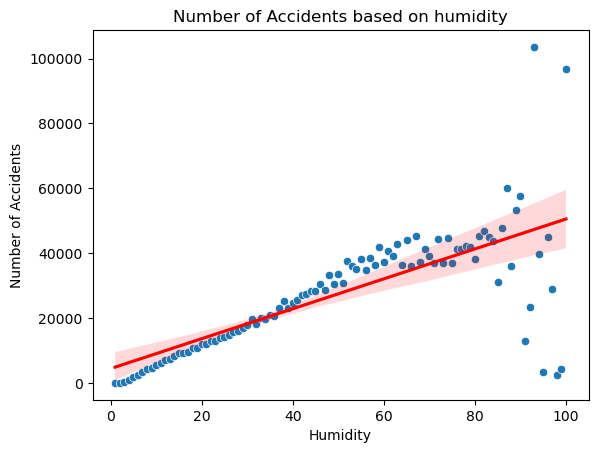

In [64]:
humidity_counts = accidents_dataset.groupby('Humidity(%)').size().reset_index(name='count')
sns.scatterplot(x='Humidity(%)', y='count', data=humidity_counts)
sns.regplot(x='Humidity(%)', y='count', data=humidity_counts, scatter=False, color='red')
plt.title('Number of Accidents based on humidity')
plt.xlabel('Humidity')
plt.ylabel('Number of Accidents')
plt.show()